In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Here customer Id is not useful, so dropping it.
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
#Monthly charges are float and Totalcharges are object, lets look into it.


In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
#Here TotalCharges are string, need to convert that to float

In [10]:
#Here there are some null values, so can't use to_numeric directly.

In [11]:
pd.to_numeric(df.TotalCharges, errors='coerce')
#this will covert all the remaining values where there are no errros

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
#this will show the row where the  TotalCharges is null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
#Dropping 11 rows from ~7000 doesn't make a difference so dropping these rows

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
#there is no error here

<ipython-input-16-394b43ba0d8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [17]:
df1.TotalCharges.info()
#It is converted to float

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


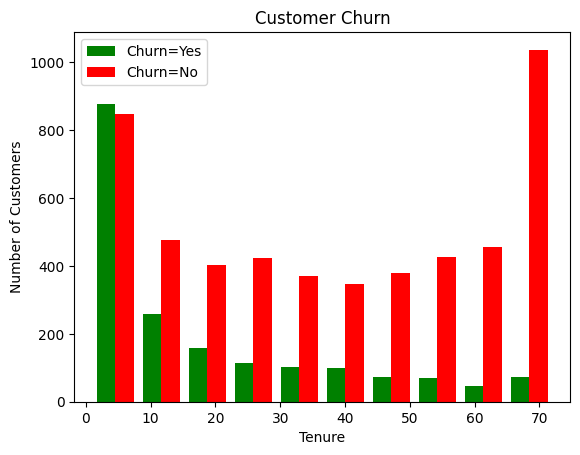

In [18]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

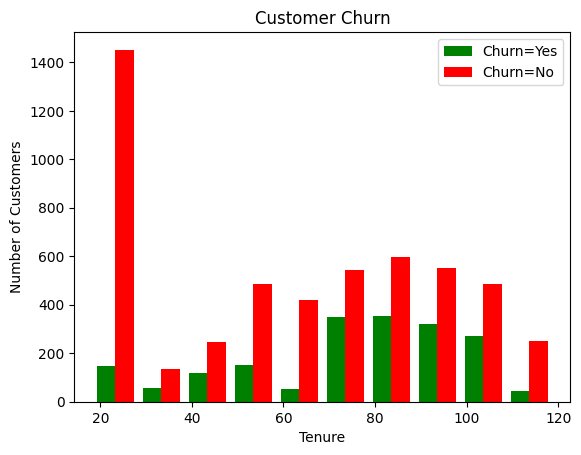

In [19]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn")

plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [20]:
for column in df1:
  print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [21]:
#Checking for categorical values only
for column in df1:
  if df[column].dtypes=='object':
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [22]:
def print_unique_col_value(df):
  for column in df1:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [23]:
print_unique_col_value(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [24]:
df1.replace('No phone service','No', inplace=True)

<ipython-input-24-36c5757cca6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True)


In [25]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [26]:
df1.replace('No internet service','No', inplace=True)

<ipython-input-26-9a17c241870b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True)


In [27]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [28]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection'
                ,'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  df1[col].replace({'Yes':1, 'No':0}, inplace = True)

<ipython-input-28-1588b236d14d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace = True)


In [29]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [31]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace =True)

<ipython-input-31-68be3acbb159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace =True)


In [32]:
df1['gender'].unique()

array([1, 0])

In [33]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [34]:
df2.info()
#All are in number format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [35]:
#Need to scale the columns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1712,1,0,0,0,0.394366,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3195,1,0,0,0,0.112676,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1766,1,0,1,1,0.366197,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1992,1,0,0,0,0.225352,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4003,1,0,0,0,0.521127,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


Build an ML model

In [37]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=99)

In [40]:
X_train.shape


(5274, 26)

In [41]:
X_test.shape

(1758, 26)

In [42]:
y_train.shape

(5274,)

In [52]:
y_test.value_counts()

0    1309
1     449
Name: Churn, dtype: int64

In [43]:
from keras.engine.training import optimizer
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(26,), activation='relu'))
model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs =10)

Epoch 1/10
165/165 [==============================] - 3s 5ms/step - loss: 0.5437 - accuracy: 0.7217
Epoch 2/10
165/165 [==============================] - 1s 3ms/step - loss: 0.4447 - accuracy: 0.7833
Epoch 3/10
165/165 [==============================] - 1s 3ms/step - loss: 0.4338 - accuracy: 0.7846
Epoch 4/10
165/165 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7892
Epoch 5/10
165/165 [==============================] - 1s 3ms/step - loss: 0.4284 - accuracy: 0.7931
Epoch 6/10
165/165 [==============================] - 1s 6ms/step - loss: 0.4264 - accuracy: 0.7941
Epoch 7/10
165/165 [==============================] - 1s 7ms/step - loss: 0.4266 - accuracy: 0.7945
Epoch 8/10
165/165 [==============================] - 1s 8ms/step - loss: 0.4243 - accuracy: 0.7994
Epoch 9/10
165/165 [==============================] - 1s 5ms/step - loss: 0.4240 - accuracy: 0.7956
Epoch 10/10
165/165 [==============================] - 1s 4ms/step - loss: 0.4235 - accuracy: 0.8002

In [44]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8225


[0.39813393354415894, 0.8225256204605103]

In [45]:
y_predict = model.predict(X_test)
y_predict[:5]

55/55 [==============================] - 0s 2ms/step


array([[0.43032184],
       [0.5581604 ],
       [0.03175933],
       [0.00836213],
       [0.5228538 ]], dtype=float32)

In [46]:
y_test[:5]

6908    1
6533    0
1638    0
5192    0
7018    1
Name: Churn, dtype: int64

Here the y_test is 1D and y_predict is 2D so convert y_predict to 1D, and make it to either 0 or 1

In [47]:
y_pred = []
for i in y_predict:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [48]:
y_pred[:5]

[0, 1, 0, 0, 1]

Confusion Matrix, Classification report

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1309
           1       0.68      0.57      0.62       449

    accuracy                           0.82      1758
   macro avg       0.77      0.74      0.75      1758
weighted avg       0.81      0.82      0.82      1758



Text(50.722222222222214, 0.5, 'Truth')

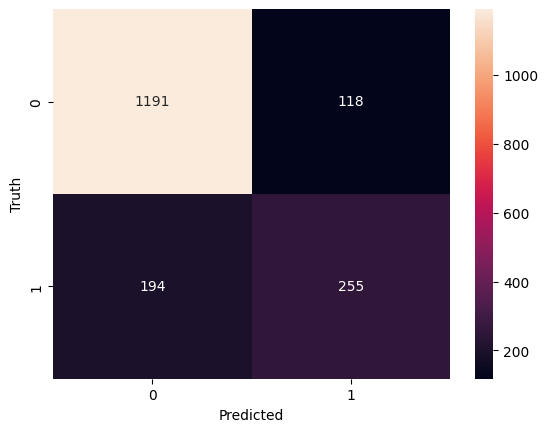

In [50]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred)

sns.heatmap(cm, annot=True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
round((1199+248)/(1199+248+201+110), 2)
#Accuracy

0.82

Mitigating Skewness of the data

## UnderSampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [53]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [54]:
df_class_0.shape

(5163, 27)

In [55]:
df_class_1.shape

(1869, 27)

In [56]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [57]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [58]:
df_test_under.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3222,0,0,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4915,1,0,1,1,0.295775,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
6846,1,0,0,0,0.000000,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
5475,0,0,0,1,0.746479,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3585,0,1,1,0,0.464789,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [59]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

In [60]:
#Stratify will take care of balanced dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15, stratify=y)

In [61]:
# Number of classes in training Data
y_train.value_counts()

1    1402
0    1401
Name: Churn, dtype: int64

In [62]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_shape=(26,), activation='relu'))
    model.add(tf.keras.layers.Dense(15, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

    model.compile(optimizer='adam', loss= loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=15)
    else:
        model.fit(X_train, y_train, epochs=15, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [63]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
88/88 [==============================] - 2s 4ms/step - loss: 0.6319 - accuracy: 0.6325
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7474
Epoch 3/15
88/88 [==============================] - 0s 4ms/step - loss: 0.5021 - accuracy: 0.7578
Epoch 4/15
88/88 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.7617
Epoch 5/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7606
Epoch 6/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7620
Epoch 7/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7653
Epoch 8/15
88/88 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7706
Epoch 9/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7695
Epoch 10/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7706
Epoch 11/15
88/88 [

Precision and recall, f1 score for class 1 are improved

## Oversampling

In [64]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


In [65]:
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [66]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15, stratify=y)

In [69]:
# Number of classes in training Data
y_train.value_counts()

0    3872
1    3872
Name: Churn, dtype: int64

In [70]:
y_test.value_counts()

1    1291
0    1291
Name: Churn, dtype: int64

In [71]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
242/242 [==============================] - 2s 3ms/step - loss: 0.5427 - accuracy: 0.7266
Epoch 2/15
242/242 [==============================] - 1s 3ms/step - loss: 0.4915 - accuracy: 0.7568
Epoch 3/15
242/242 [==============================] - 1s 4ms/step - loss: 0.4844 - accuracy: 0.7655
Epoch 4/15
242/242 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.7665
Epoch 5/15
242/242 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7682
Epoch 6/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7721
Epoch 7/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7741
Epoch 8/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7743
Epoch 9/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7757
Epoch 10/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7782

## SMOTE

In [72]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [78]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()


0    5163
1    5163
Name: Churn, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=99, stratify=y_sm)

In [80]:
# Number of classes in training Data
y_train.value_counts()

1    3872
0    3872
Name: Churn, dtype: int64

In [81]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
242/242 [==============================] - 2s 3ms/step - loss: 0.5458 - accuracy: 0.7392
Epoch 2/15
242/242 [==============================] - 1s 3ms/step - loss: 0.4764 - accuracy: 0.7718
Epoch 3/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7784
Epoch 4/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7794
Epoch 5/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7815
Epoch 6/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7851
Epoch 7/15
242/242 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7872
Epoch 8/15
242/242 [==============================] - 1s 2ms/step - loss: 0.4484 - accuracy: 0.7902
Epoch 9/15
242/242 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.7936
Epoch 10/15
242/242 [==============================] - 1s 3ms/step - loss: 0.4429 - accuracy: 0.7903

## Use of Ensemble with undersampling

In [82]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [83]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [85]:
y_train.value_counts()


0    3872
1    1402
Name: Churn, dtype: int64

In [87]:
#Approx 1:3 ratio
3872/1402

2.761768901569187

model1 --> class1(1402) + class0(0, 1402)

model2 --> class1(1402) + class0(1403, 2804)

model3 --> class1(1402) + class0(2804, 3872)

In [88]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [89]:
df3.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1465,0,0,1,1,0.000000,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
3856,0,0,1,0,0.845070,1,1,0,1,1,...,1,0,1,0,0,0,0,1,0,0
3766,1,1,0,0,0.000000,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
6571,1,0,0,0,0.464789,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
6599,1,0,1,0,0.169014,1,1,0,1,1,...,1,0,1,0,0,0,0,1,0,1


In [90]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [91]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [92]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1402)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
88/88 [==============================] - 2s 4ms/step - loss: 0.6309 - accuracy: 0.6484
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.7336
Epoch 3/15
88/88 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.7525
Epoch 4/15
88/88 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7539
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.7514
Epoch 6/15
88/88 [==============================] - 1s 8ms/step - loss: 0.4979 - accuracy: 0.7529
Epoch 7/15
88/88 [==============================] - 1s 6ms/step - loss: 0.4961 - accuracy: 0.7518
Epoch 8/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7582
Epoch 9/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7557
Epoch 10/15
88/88 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7621
Epoch 11/15
88/88 [

In [93]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1402, 2804)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
88/88 [==============================] - 2s 3ms/step - loss: 0.6318 - accuracy: 0.6644
Epoch 2/15
88/88 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7525
Epoch 3/15
88/88 [==============================] - 0s 4ms/step - loss: 0.5009 - accuracy: 0.7646
Epoch 4/15
88/88 [==============================] - 0s 5ms/step - loss: 0.4906 - accuracy: 0.7660
Epoch 5/15
88/88 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.7657
Epoch 6/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7700
Epoch 7/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7732
Epoch 8/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7732
Epoch 9/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7743
Epoch 10/15
88/88 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7782
Epoch 11/15
88/88 [

In [94]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2804, 3872)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
78/78 [==============================] - 2s 4ms/step - loss: 0.6699 - accuracy: 0.6036
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7401
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.4918 - accuracy: 0.7696
Epoch 4/15
78/78 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7725
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7729
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7757
Epoch 7/15
78/78 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.7777
Epoch 8/15
78/78 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7802
Epoch 9/15
78/78 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7785
Epoch 10/15
78/78 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7749
Epoch 11/15
78/78 [

In [95]:
 y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [96]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1291
           1       0.53      0.79      0.63       467

    accuracy                           0.76      1758
   macro avg       0.72      0.77      0.72      1758
weighted avg       0.81      0.76      0.77      1758



From all 4 methods tried, SMOTE performed better with 80% f1-score.